In [2]:
import requests
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from evaluate import load

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
link = "http://localhost:8000/comment/predict/model_gb"

In [6]:
folder_path="C:/Users/felip/Documents/Tesis/datos_pruebas/clean_texts/med"
# Get all the texts in the folder
files = os.listdir(folder_path)
texts_med = []
for file in files:
    with open(folder_path + "/" + file, 'r', encoding="utf-8") as f:
        texts_med.append(f.read())

In [8]:
folder_path="C:/Users/felip/Documents/Tesis/datos_pruebas/clean_texts/alx"
# Get all the texts in the folder
files = os.listdir(folder_path)
texts_alx = []
for file in files:
    with open(folder_path + "/" + file, 'r', encoding="utf-8") as f:
        texts_alx.append(f.read())

In [10]:
# GEt file names
responses_alx_med_gb = []
responses_alx_med_rf = []
responses_alx_med_emd = []
texts_alx_med = texts_med + texts_alx
for text in texts_alx_med:
    data = {'text': text}
    response_gb = requests.post("http://localhost:8000/comment/predict/model_gb", json=data)
    response_rf = requests.post("http://localhost:8000/comment/predict/model_rf", json=data)
    response_emd = requests.post("http://localhost:8000/comment/predict/model_emd", json=data)
    responses_alx_med_gb.append(response_gb.json())
    responses_alx_med_rf.append(response_rf.json())
    responses_alx_med_emd.append(response_emd.json())

In [ ]:
import json

with open('responses_alx_med_gb.json', 'w') as f:
    json.dump(responses_alx_med_gb, f)
with open('responses_alx_med_rf.json', 'w') as f:
    json.dump(responses_alx_med_rf, f)
with open('responses_alx_med_emd.json', 'w') as f:
    json.dump(responses_alx_med_emd, f)


In [4]:
# Read C:/Users/felip/Documents/Tesis/pipeline/Clinical Trials_Test_Dataset.xlsx

df = pd.read_excel("Clinical Trials_Test_Dataset (2).xlsx", sheet_name="Text Sample")
df

,StudyID,Text,PL,Count Words,Min Count,GPTTest
0,NCT00310388,"Title: A Multicenter, Open-Label, Long-Term, S...",0,4470,Ok,NaN
1,NCT01704287,Title: A Phase III Randomized Trial of MK-3475...,0,3981,Ok,NaN
2,NCT01704287,"Indication of the Study: Head and Neck Cancer,...",0,1560,Ok,NaN
3,NCT01704287,Study Rationale: Head and neck cancer describe...,0,1225,Ok,NaN
4,NCT02054806,Title: A Phase 3 Clinical Trial of Pembrolizum...,0,5480,Ok,NaN
...,...,...,...,...,...,...
109,NCT03557281,Title: A Phase IIa Open-label Trial to Investi...,0,622,Ok,NaN
110,NCT03557281,"Indication of the Study: Tuberculosis, Inclusi...",0,632,Ok,NaN
111,NCT03557281,Study Rationale: This trial seeks to establish...,0,947,Ok,NaN
112,NCT03557281,Title: A Phase IIa Open-label Trial to Investi...,0,2199,Ok,Y


In [5]:
df = df[['Text', 'PL', 'GPTTest']]
df = df.rename(columns={'Text': 'text', 'PL': 'label'})

In [6]:
df

,text,label,GPTTest
0,"Title: A Multicenter, Open-Label, Long-Term, S...",0,NaN
1,Title: A Phase III Randomized Trial of MK-3475...,0,NaN
2,"Indication of the Study: Head and Neck Cancer,...",0,NaN
3,Study Rationale: Head and neck cancer describe...,0,NaN
4,Title: A Phase 3 Clinical Trial of Pembrolizum...,0,NaN
...,...,...,...
109,Title: A Phase IIa Open-label Trial to Investi...,0,NaN
110,"Indication of the Study: Tuberculosis, Inclusi...",0,NaN
111,Study Rationale: This trial seeks to establish...,0,NaN
112,Title: A Phase IIa Open-label Trial to Investi...,0,Y


In [9]:
# GEt file names
responses = []
for text in df['text']:
    r = requests.post(link, json={"text": text})
    responses.append(r.json())
    print(r.json()['prediction'])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
0
0
0
0
1
0
1
0
0
0
0
1


In [10]:
len(responses)

114

In [11]:
true_labels = df['label'].tolist()

In [12]:
len(true_labels)

114

In [13]:
predictions = []

for i in range(len(responses)):
    predictions.append(int(responses[i]['prediction']))

In [14]:
len(predictions)

114

In [15]:
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Accuracy:  0.9649122807017544
Precision:  0.7647058823529411
Recall:  1.0
F1:  0.8666666666666667


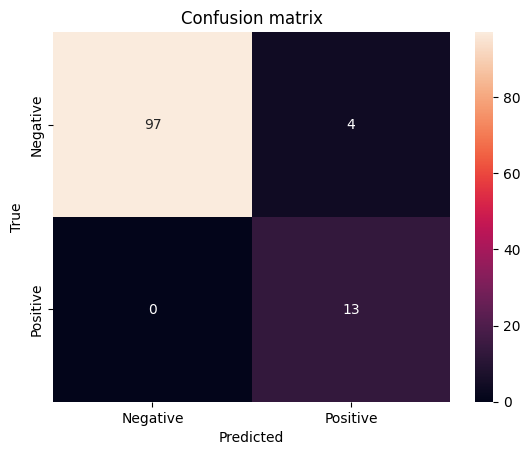

In [16]:
# Get FP, FN, TP, TN
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# Show number of samples in each class
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
scores_no_plain = []
scores_plain = []


for i in range(len(responses)):
    scores_no_plain.append(responses[i]['score_no_plain'])
    scores_plain.append(responses[i]['score_plain'])

In [18]:
import matplotlib.pyplot as plt

def plot_row(top_features, scores_no_plain, scores_plain, n=10):
    fig, ax = plt.subplots(figsize=(15, 5))
    
    width = 0.35
    x = range(n)
    
    # Dividir los datos de los diccionarios en listas
    scores_no_plain_values = [scores_no_plain[key] for key in top_features[:n]]
    scores_plain_values = [scores_plain[key] for key in top_features[:n]]

    ax.bar(x, scores_no_plain_values, width, label='No plain score', color='crimson')
    ax.bar([i + width for i in x], scores_plain_values, width, label='Plain score', color='royalblue')
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(top_features[:n], rotation=90)
    ax.set_title("Comparison of scores")
    ax.legend()
    
    plt.show()

In [19]:
# Get FP index
FP = []
for i in range(len(predictions)):
    if predictions[i] == 1 and true_labels[i] == 0:
        FP.append(i)

In [20]:
FP

[36, 54, 77, 100]

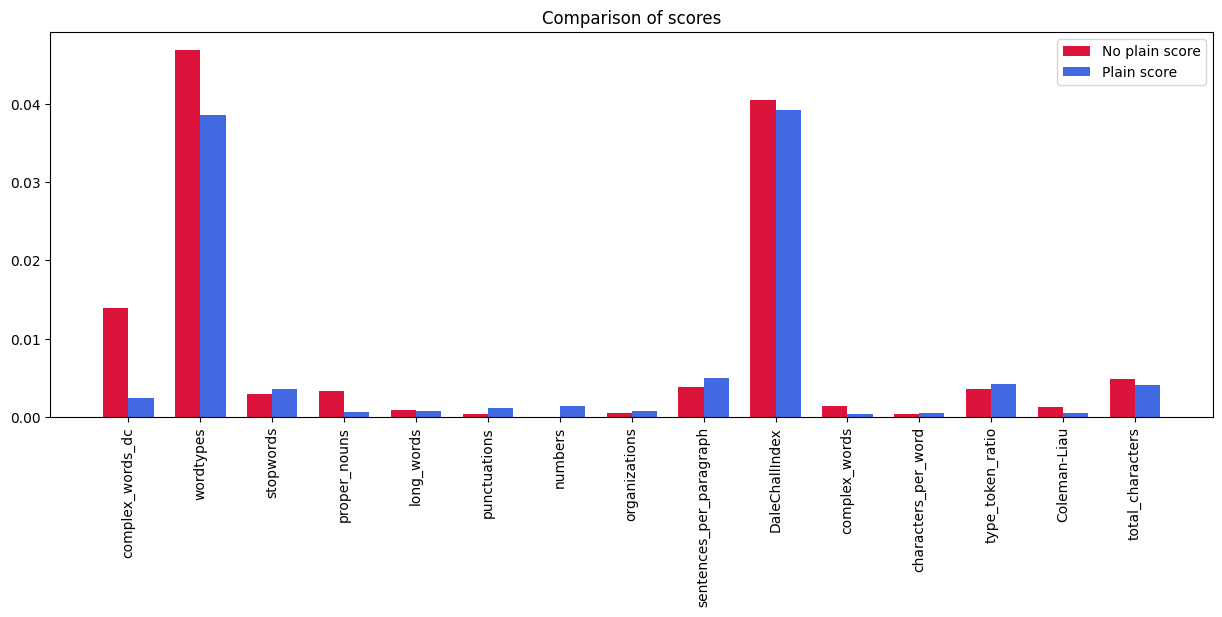

In [21]:
i = 31
plot_row(top_features=list(scores_no_plain[i].keys()), scores_no_plain=scores_no_plain[i], scores_plain=scores_plain[i], n=15)

In [23]:
responses_emd = []
for text in df['text']:
    r = requests.post("http://localhost:8000/comment/predict/model_emd", json={"text": text})
    responses_emd.append(r.json())
    print(r.json()['prediction'])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1


In [22]:
predictions_emd = []

for i in range(len(responses_emd)):
    predictions_emd.append(int(responses_emd[i]['prediction']))


NameError: name 'responses_emd' is not defined

In [26]:
predictions_emd

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1]

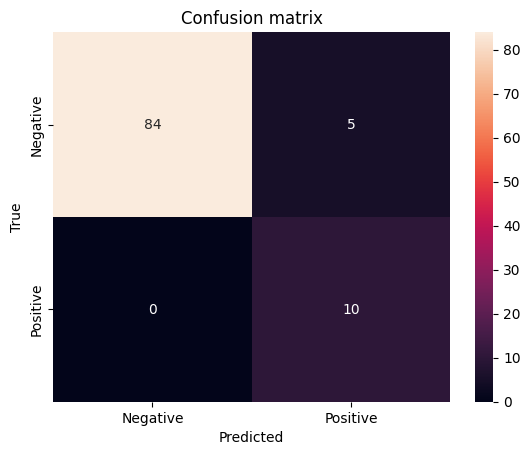

In [27]:
cm = confusion_matrix(true_labels, predictions_emd)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# Show number of samples in each class
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:
FP = []
for i in range(len(predictions_emd)):
    if predictions_emd[i] == 1 and true_labels[i] == 0:
        FP.append(i)

In [24]:
FP

[]

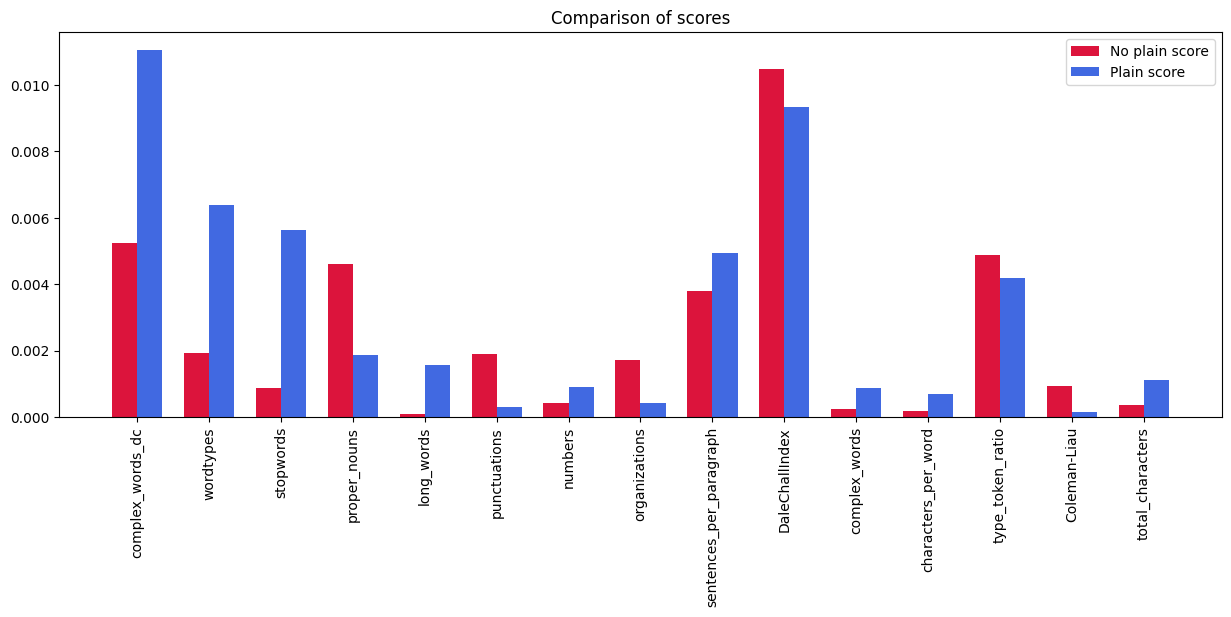

In [75]:
i = 46
plot_row(top_features=list(scores_no_plain[i].keys()), scores_no_plain=scores_no_plain[i], scores_plain=scores_plain[i], n=15)

# BERT-Score

In [2]:
bertscore = load("bertscore")

In [3]:
bleu = load("bleu")
rouge = load("rouge")

In [4]:
meteor = load('meteor')
bleurt = load("bleurt", module_type="metric")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Using default BLEURT-Base checkpoint for sequence maximum length 128. You can use a bigger model for better results with e.g.: evaluate.load('bleurt', 'bleurt-large-512').


INFO:tensorflow:Reading checkpoint C:\Users\felip\.cache\huggingface\metrics\bleurt\default\downloads\extracted\e408ab8b975eeab90ddead1fa48492214c3e5b6805426a9c1942f5729014f80d\bleurt-base-128.
INFO:tensorflow:Config file found, reading.
INFO:tensorflow:Will load checkpoint bert_custom
INFO:tensorflow:Loads full paths and checks that files exists.
INFO:tensorflow:... name:bert_custom
INFO:tensorflow:... vocab_file:vocab.txt
INFO:tensorflow:... bert_config_file:bert_config.json
INFO:tensorflow:... do_lower_case:True
INFO:tensorflow:... max_seq_length:128
INFO:tensorflow:Creating BLEURT scorer.
INFO:tensorflow:Creating WordPiece tokenizer.
INFO:tensorflow:WordPiece tokenizer instantiated.
INFO:tensorflow:Creating Eager Mode predictor.
INFO:tensorflow:Loading model.
INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


In [5]:
folder_path_ground_truth = "output_cochrane/ground_truth"
folder_path_gpt_35 = "output_cochrane/gpt-35"
folder_path_gpt_4 = "output_cochrane/gpt-4"

# Get all the texts in the folder
files = os.listdir(folder_path_ground_truth)
texts_ground_truth = []
for file in files:
    with open(folder_path_ground_truth + "/" + file, 'r', encoding="utf-8") as f:
        texts_ground_truth.append(f.read())

# Get all the texts in the folder
files = os.listdir(folder_path_gpt_35)
texts_gpt_35 = []
for file in files:
    with open(folder_path_gpt_35 + "/" + file, 'r', encoding="utf-8") as f:
        texts_gpt_35.append(f.read())

# Get all the texts in the folder
files = os.listdir(folder_path_gpt_4)
texts_gpt_4 = []
for file in files:
    with open(folder_path_gpt_4 + "/" + file, 'r', encoding="utf-8") as f:
        texts_gpt_4.append(f.read())

In [ ]:
results_longformer_cochrane_gpt4 = bertscore.compute(predictions=texts_gpt_4, references=texts_ground_truth, model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt35 = bertscore.compute(predictions=texts_gpt_35, references=texts_ground_truth, model_type="allenai/longformer-large-4096-finetuned-triviaqa")

In [18]:
df = df[df["GPTTest"] == "Y"]
df_no_plain = df[df["label"] == 0]

In [20]:
df_plain =  df[df["label"] == 1]

In [23]:
# Save texts in ground truth folder
folder_path_ground_truth = "score_tests/ground_truth"

for i in range(len(df_plain)):
    with open(folder_path_ground_truth + "/" + str(i) + ".txt", 'w', encoding="utf-8") as f:
        f.write(df_plain.iloc[i]['text'])

In [85]:
df_plain

,StudyID,Text,PL,Count Words,Min Count,GPTTest
17,NCT02446899,Efficacy and Safety of Anifrolumab Compared to...,1,616,Ok,Y
22,NCT02446912,A study to find out if anifrolumab reduces lup...,1,662,Ok,Y
37,NCT02794285,Long Term Safety of Anifrolumab in Adult Subje...,1,669,Ok,Y
52,NCT03084471,"An Open-Label, Multi-Centre, Study to Assess t...",1,474,Ok,Y
86,NCT03980483,A study to assess the effectiveness and safety...,1,461,Ok,Y
94,NCT04376684,A study to learn about the effect of otilimab ...,1,598,Ok,Y
106,NTC04428333,A study to compare the effects of feladilimab ...,1,613,Ok,Y
108,NCT02821416,A study to find out how benralizumab works in ...,1,677,Ok,Y
113,NCT03557281,"An early bactericidal activity, safety and tol...",1,595,Ok,Y


In [86]:
df_no_plain

,StudyID,Text,PL,Count Words,Min Count,GPTTest
16,NCT02446899,"Title: A Multicentre, Randomised, Double-blind...",0,2937,Ok,Y
21,NCT02446912,"Title: A Multicentre, Randomised, Double-blind...",0,4958,Ok,Y
41,NCT02794285,"Title: A Multicentre, Randomised, Double-blind...",0,2691,Ok,Y
51,NCT03084471,"Title: An Open-Label, Multi-Centre, Safety Stu...",0,3049,Ok,Y
85,NCT03980483,"Title: A 52-week, Phase 3, Multicentre, Random...",0,2446,Ok,Y
93,NCT04376684,"Title: A Randomized, Double-blind, Placebo-con...",0,2104,Ok,Y
105,NTC04428333,"Title: A Randomized, Double-Blind, Adaptive, P...",0,3356,Ok,Y
107,NCT02821416,"Title: A Double-Blind, Randomized, Parallel Gr...",0,4011,Ok,Y
112,NCT03557281,Title: A Phase IIa Open-label Trial to Investi...,0,2199,Ok,Y


In [87]:
df_plain

,StudyID,Text,PL,Count Words,Min Count,GPTTest
17,NCT02446899,Efficacy and Safety of Anifrolumab Compared to...,1,616,Ok,Y
22,NCT02446912,A study to find out if anifrolumab reduces lup...,1,662,Ok,Y
37,NCT02794285,Long Term Safety of Anifrolumab in Adult Subje...,1,669,Ok,Y
52,NCT03084471,"An Open-Label, Multi-Centre, Study to Assess t...",1,474,Ok,Y
86,NCT03980483,A study to assess the effectiveness and safety...,1,461,Ok,Y
94,NCT04376684,A study to learn about the effect of otilimab ...,1,598,Ok,Y
106,NTC04428333,A study to compare the effects of feladilimab ...,1,613,Ok,Y
108,NCT02821416,A study to find out how benralizumab works in ...,1,677,Ok,Y
113,NCT03557281,"An early bactericidal activity, safety and tol...",1,595,Ok,Y


In [88]:
# import openai
# os.environ["OPENAI_API_BASE"] = ""
# os.environ["OPENAI_API_KEY"] = ""
# openai.api_key = os.getenv("OPENAI_API_KEY")
# openai.api_base = os.getenv("OPENAI_API_BASE") # your endpoint should look like the following https://YOUR_RESOURCE_NAME.openai.azure.com/
# openai.api_type = 'azure'
# openai.api_version = '2023-05-15' # this may change in the future

In [100]:
texts_no_plain = df_plain["Text"].values

In [101]:
texts_original = df_plain["Text"].values

In [91]:
# i = 0
# for text in texts:    
#     prompt = f"""
# Using the following clinical trial protocol text as input, generate a Protocol Plain Language Summary (PPLS) compliant with GDPR and understandable by any patient, regardless of their health literacy. Ensure that the generated text adheres to the following instructions which should be followed step-by-step: 

# a. Specific Structure: the generated PPLS should be presented in a logical order, using the following headings:
#     1. Plain Protocol Title.
#     2. Rationale
#     3. Objectives
#     4. Trial Design
#     5. Trial Population
#     6. Interventions 
# b. Sections should be authored following these parameters:
#     1. Plain Protocol Title: Simplified protocol title understandable to a layperson 
#     2. Rationale: Include: phrase ‘Researchers are looking for a better way to treat [condition]; background or study rationale providing a general description of the condition, what it may cause or why it is a burden for the patients; the reason and main hypothesis for the study; and why the study is needed, and the study medication has the potential to treat the condition. 
#     3. Objectives: Answer ‘What are the goals of the study?’ Specify the main and secondary objectives of the trial and how will they be measured (eg. the main trial endpoint is the percent change in the number of events from baseline to a specified time or the total number of adverse reactions at a particular time after baseline). 
#     4. Trial Design: Answer ‘How is this study designed?’ Include the description of the design and the expected amount of time a person will be in the study. 
#     5. Trial Population: answer ‘Who will participate in this study?’ Include description of study and patient population (age, health condition, genre), the main or key inclusion and exclusion criteria.
#     6. Interventions: answer ‘What treatments are being given during the study?’  Include a description of medication, vaccine or treatment(s) being studied, the route of administration, the duration of treatment, and any study-related diagnostic and monitoring procedures used. Include justification if placebo is used.
# c. Consistency and Replicability: the generated PPLS should be consistent regardless of the order of sentences or the specific phrasing used in the input protocol text. 
# d. Compliance with Plain Language Guidelines: The generated PPLS must follow these plain language guidelines:
#     1. Have readability grade level of 6 or below. 
#     2. Do not have jargon. All technical or medical words or terms should be defined or broken down into simple and logical explanations. 
#     3. Active voice, not passive 
#     4. Mostly one or two syllable words 
#     5. Sentences of 15 words or less 
#     6. Short paragraphs of 3-5 sentences 
#     7. Simple numbers (eg, ratios, no percentages)
# e. No Extra Content: The AI model should not invent information or add content that is not present in the input protocol. The PPLS should only present information from the original protocol in a simplified and understandable manner.
# f. Aim for an approximate PPLS length of 500-900 words. 

# Clinical Trial Protocol Text: {text}"""
    
#     response = openai.ChatCompletion.create(
#         engine="gpt-4-32k-rfmanrique",
#         messages=[{'role': 'user', 'content': prompt}],
#         ).choices[0].message["content"]
    
#     with open(f"output/{i}_gpt_4.txt", "w") as file:
#         file.write(response)
#     i += 1

In [92]:
# os.environ["OPENAI_API_BASE"] = ""
# os.environ["OPENAI_API_KEY"] = ""
# openai.api_key = os.getenv("OPENAI_API_KEY")
# openai.api_base = os.getenv("OPENAI_API_BASE") # your endpoint should look like the following https://YOUR_RESOURCE_NAME.openai.azure.com/
# openai.api_type = 'azure'
# openai.api_version = '2023-05-15' # this may change in the future

In [93]:
# i = 0
# for text in texts:    
#     prompt = f"""
# Using the following clinical trial protocol text as input, generate a Protocol Plain Language Summary (PPLS) compliant with GDPR and understandable by any patient, regardless of their health literacy. Ensure that the generated text adheres to the following instructions which should be followed step-by-step: 

# a. Specific Structure: the generated PPLS should be presented in a logical order, using the following headings:
#     1. Plain Protocol Title.
#     2. Rationale
#     3. Objectives
#     4. Trial Design
#     5. Trial Population
#     6. Interventions 
# b. Sections should be authored following these parameters:
#     1. Plain Protocol Title: Simplified protocol title understandable to a layperson 
#     2. Rationale: Include: phrase ‘Researchers are looking for a better way to treat [condition]; background or study rationale providing a general description of the condition, what it may cause or why it is a burden for the patients; the reason and main hypothesis for the study; and why the study is needed, and the study medication has the potential to treat the condition. 
#     3. Objectives: Answer ‘What are the goals of the study?’ Specify the main and secondary objectives of the trial and how will they be measured (eg. the main trial endpoint is the percent change in the number of events from baseline to a specified time or the total number of adverse reactions at a particular time after baseline). 
#     4. Trial Design: Answer ‘How is this study designed?’ Include the description of the design and the expected amount of time a person will be in the study. 
#     5. Trial Population: answer ‘Who will participate in this study?’ Include description of study and patient population (age, health condition, genre), the main or key inclusion and exclusion criteria.
#     6. Interventions: answer ‘What treatments are being given during the study?’  Include a description of medication, vaccine or treatment(s) being studied, the route of administration, the duration of treatment, and any study-related diagnostic and monitoring procedures used. Include justification if placebo is used.
# c. Consistency and Replicability: the generated PPLS should be consistent regardless of the order of sentences or the specific phrasing used in the input protocol text. 
# d. Compliance with Plain Language Guidelines: The generated PPLS must follow these plain language guidelines:
#     1. Have readability grade level of 6 or below. 
#     2. Do not have jargon. All technical or medical words or terms should be defined or broken down into simple and logical explanations. 
#     3. Active voice, not passive 
#     4. Mostly one or two syllable words 
#     5. Sentences of 15 words or less 
#     6. Short paragraphs of 3-5 sentences 
#     7. Simple numbers (eg, ratios, no percentages)
# e. No Extra Content: The AI model should not invent information or add content that is not present in the input protocol. The PPLS should only present information from the original protocol in a simplified and understandable manner.
# f. Aim for an approximate PPLS length of 500-900 words. 

# Clinical Trial Protocol Text: {text}"""
    
#     response = openai.ChatCompletion.create(
#         engine="gpt-35-turbo-16k-rfmanrique",
#         messages=[{'role': 'user', 'content': prompt}],
#         ).choices[0].message["content"]
    
#     with open(f"output_gpt35/{i}_gpt35.txt", "w") as file:
#         file.write(response)
#     i += 1

# BERT-Score

In [108]:
# REad output txt files
import os
texts_plain_gpt4 = []
for filename in os.listdir("output"):
    with open(f"output/{filename}", "r") as file:
        texts_plain_gpt4.append(file.read())
texts_plain_gpt4

["Plain Protocol Title: Testing the Effectiveness and Safety of Anifrolumab in Adults with Active Lupus\n\nRationale: Lupus is a chronic illness that affects the immune system and can cause different health problems throughout the body. The disease can cause fatigue, rashes, joint pain, and kidney problems, among other things. This can lead to physical discomfort and even job loss, reducing the quality of life for patients. Right now, there's a need for better ways to treat Lupus. This study aims to see if a new medication, called Anifrolumab, can safely and effectively treat adults with active Lupus. \n\nObjectives: The main goal of this study is to see if Anifrolumab can improve Lupus symptoms better than a placebo, after one year of treatment. Improvement will be measured using a special assessment tool called the British Isles Lupus Assessment Group-based Composite Lupus Assessment (BICLA). This tool checks a variety of signs and symptoms of Lupus, looking for improvements. Other o

In [109]:
import os
texts_plain_gpt_35 = []
for filename in os.listdir("output_gpt35"):
    with open(f"output_gpt35/{filename}", "r") as file:
        texts_plain_gpt_35.append(file.read())
texts_plain_gpt_35

['Plain Protocol Title: Study on Anifrolumab Treatment for Lupus\n\nRationale: Researchers are looking for a better way to treat systemic lupus erythematosus (SLE). SLE is a chronic autoimmune disease that affects many parts of the body. It can cause various symptoms and can lead to serious health problems. Current treatments for SLE have limitations and side effects. This study aims to evaluate the effectiveness and safety of anifrolumab, a medication given through an intravenous treatment, compared to a placebo in adults with moderate to severe SLE.\n\nObjectives: The main goal of this study is to see if anifrolumab is better than a placebo at reducing disease activity in people with SLE. The secondary objectives include evaluating the effects of anifrolumab on specific symptoms of SLE, such as joint pain and skin rash.\n\nTrial Design: This study is a Phase 3, multicenter, double-blind, placebo-controlled trial. Participants will receive either anifrolumab or a placebo intravenously

In [96]:
# results_gpt4 = bertscore.compute(predictions=texts_plain_gpt4, references=texts_original, model_type="facebook/bart-large-mnli")
results_gpt4 = rouge.compute(predictions=texts_plain_gpt4, references=texts_original, use_aggregator=False)
results_gpt_35 = rouge.compute(predictions=texts_plain_gpt_35, references=texts_original, use_aggregator=False)

In [115]:
texts_original_L = [[text] for text in texts_original]
# texts_plain_gpt4_L = [[text] for text in texts_plain_gpt4]
# texts_plain_gpt_35_L = [[text] for text in texts_plain_gpt_35]

In [114]:
texts_plain_gpt4

["Plain Protocol Title: Testing the Effectiveness and Safety of Anifrolumab in Adults with Active Lupus\n\nRationale: Lupus is a chronic illness that affects the immune system and can cause different health problems throughout the body. The disease can cause fatigue, rashes, joint pain, and kidney problems, among other things. This can lead to physical discomfort and even job loss, reducing the quality of life for patients. Right now, there's a need for better ways to treat Lupus. This study aims to see if a new medication, called Anifrolumab, can safely and effectively treat adults with active Lupus. \n\nObjectives: The main goal of this study is to see if Anifrolumab can improve Lupus symptoms better than a placebo, after one year of treatment. Improvement will be measured using a special assessment tool called the British Isles Lupus Assessment Group-based Composite Lupus Assessment (BICLA). This tool checks a variety of signs and symptoms of Lupus, looking for improvements. Other o

In [117]:
results_gpt4 = meteor.compute(predictions=texts_plain_gpt4, references=texts_original)
results_gpt_35 = meteor.compute(predictions=texts_plain_gpt_35, references=texts_original)

In [118]:
results_gpt4

{'meteor': 0.23764537042621933}

In [22]:
# microsoft/deberta-v3-base
results_deberta_v3_gpt4 = bertscore.compute(predictions=texts_plain_gpt4, references=texts_original, model_type="microsoft/deberta-v3-base")
results_deberta_v3_gpt35 = bertscore.compute(predictions=texts_plain_gpt_35, references=texts_original, model_type="microsoft/deberta-v3-base")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


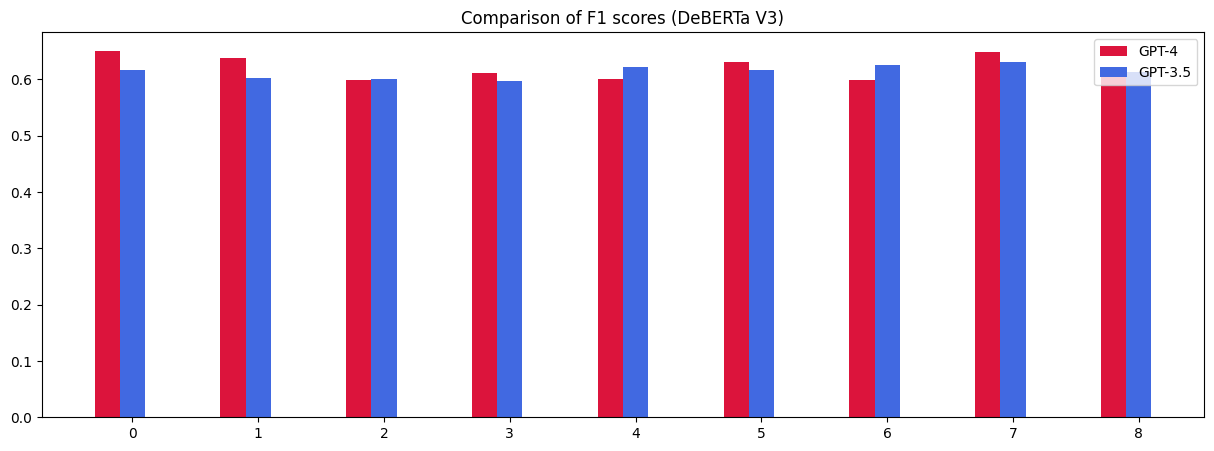

In [23]:
# Plot f1 score
f1_scores = results_deberta_v3_gpt4["f1"]
f1_scores_gpt_35 = results_deberta_v3_gpt35["f1"]

# plot

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(f1_scores))

ax.bar(x, f1_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], f1_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(f1_scores))])
ax.set_title("Comparison of F1 scores (DeBERTa V3)")
ax.legend()

plt.show()

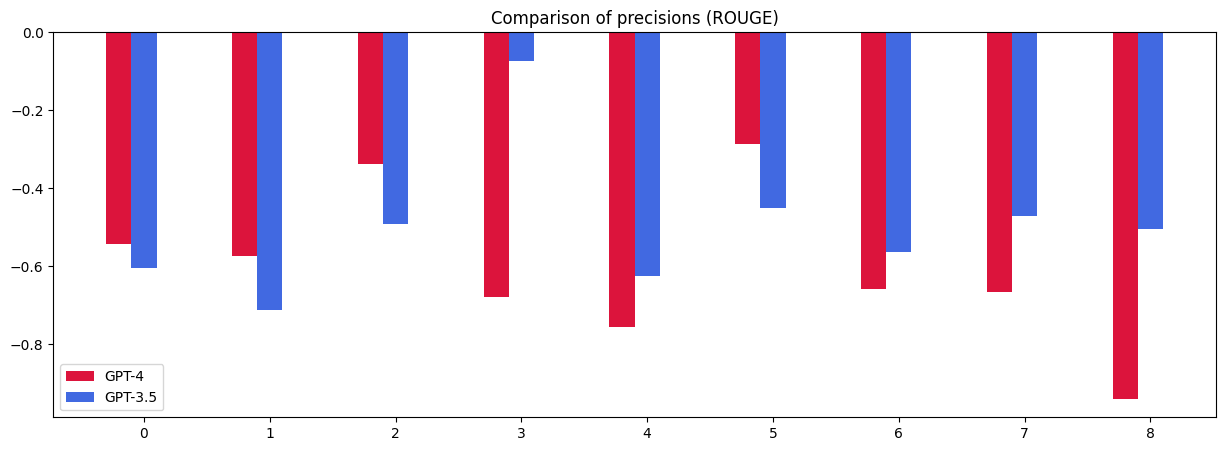

In [58]:
# Plot precisions score
precisions_scores = results_gpt4['scores']
precisions_scores_gpt_35 = results_gpt_35['scores']

# plot

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(precisions_scores))

ax.bar(x, precisions_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], precisions_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(precisions_scores))])
ax.set_title("Comparison of precisions (ROUGE)")
ax.legend()

plt.show()

In [43]:
#  allenai/longformer-large-4096-finetuned-triviaqa
results_longformer_gpt4 = bertscore.compute(predictions=texts_plain_gpt4, references=texts_original, model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_gpt35 = bertscore.compute(predictions=texts_plain_gpt_35, references=texts_original, model_type="allenai/longformer-large-4096-finetuned-triviaqa")

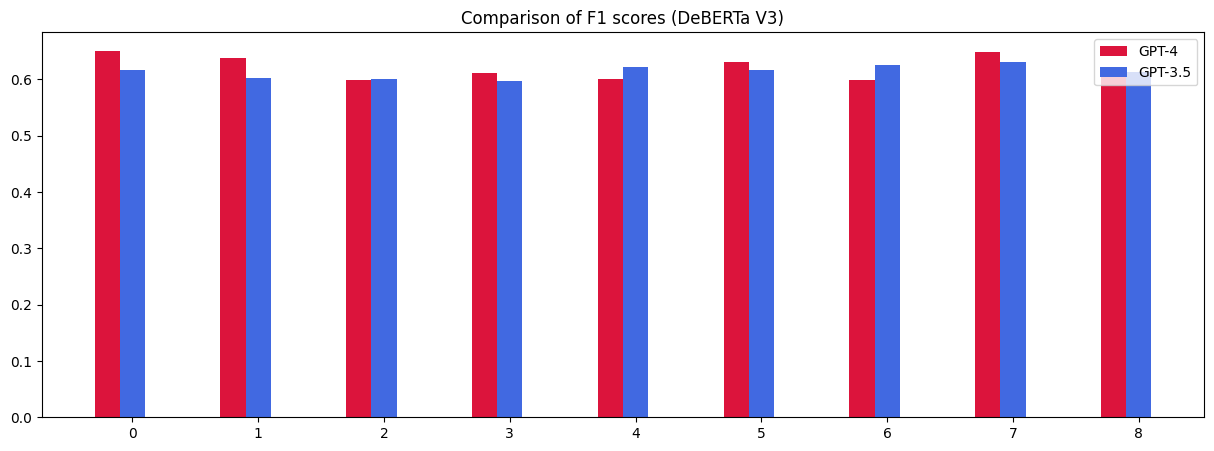

In [41]:
# Plot f1 score
f1_scores = results_deberta_v3_gpt4["f1"]
f1_scores_gpt_35 = results_deberta_v3_gpt35["f1"]

# plot

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(f1_scores))

ax.bar(x, f1_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], f1_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(f1_scores))])
ax.set_title("Comparison of F1 scores (DeBERTa V3)")
ax.legend()

plt.show()

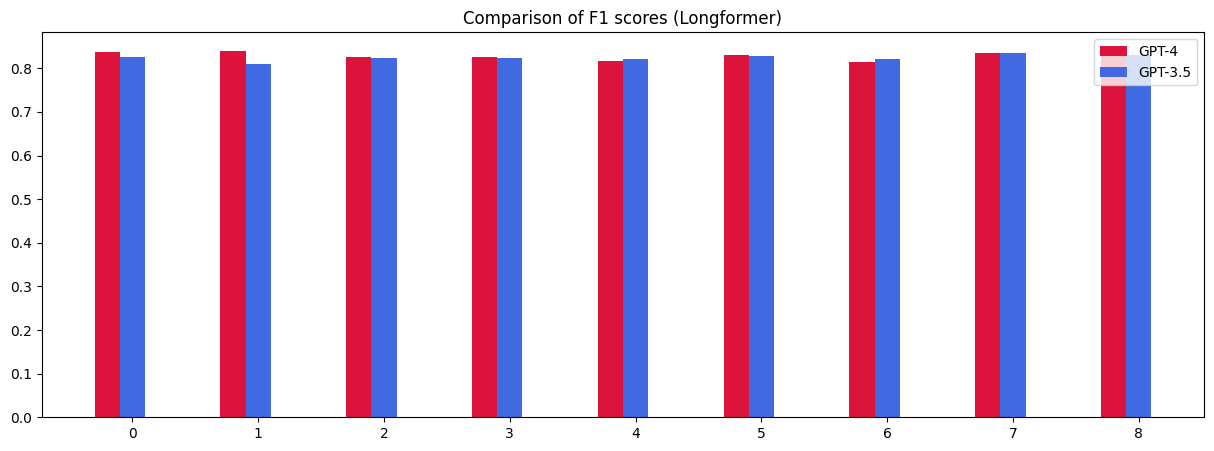

In [51]:
# Plot f1 score
f1_scores = results_longformer_gpt4["f1"]
f1_scores_gpt_35 = results_longformer_gpt35["f1"]

# plot

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(f1_scores))

ax.bar(x, f1_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], f1_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(f1_scores))])
ax.set_title("Comparison of F1 scores (Longformer)")
ax.legend()

plt.show()

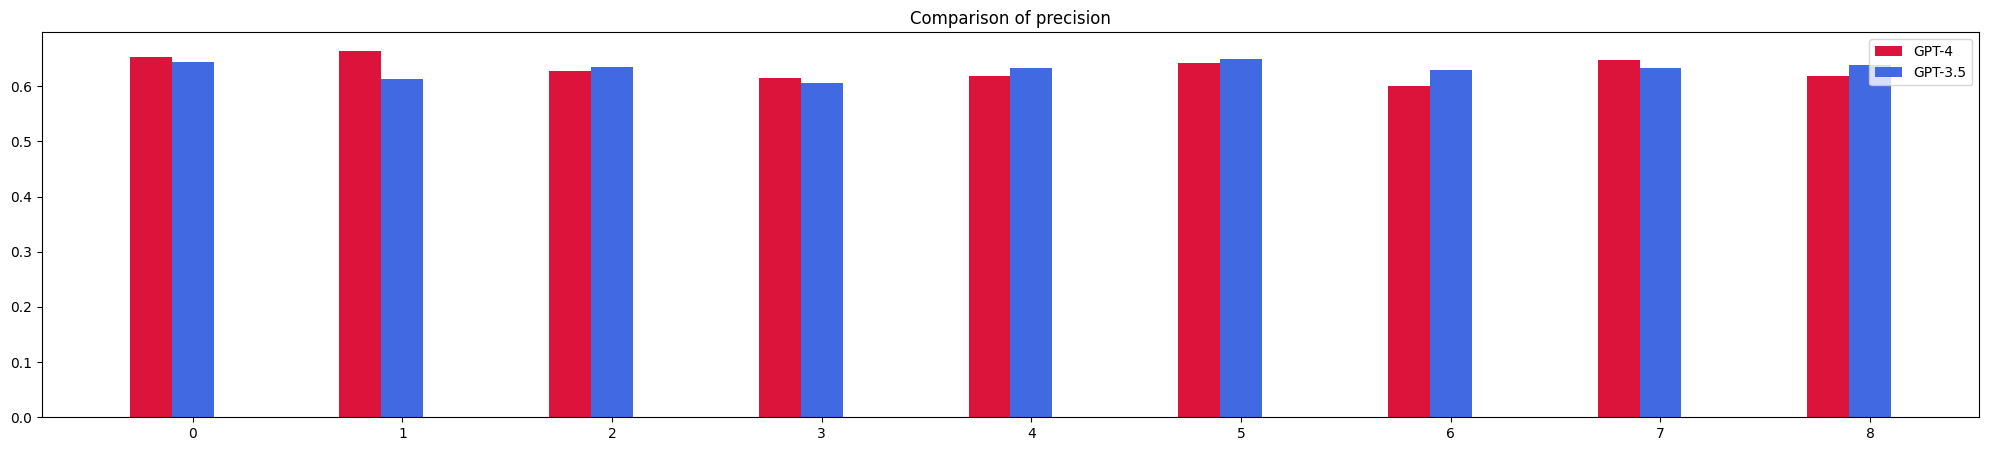

In [50]:
# Plot f1 score

f1_scores = results_gpt4["precision"]
f1_scores_gpt_35 = results_gpt_35["precision"]


# plot

fig, ax = plt.subplots(figsize=(25, 5))

width = 0.2
x = range(len(f1_scores))

ax.bar(x, f1_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], f1_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(f1_scores))])
ax.set_title("Comparison of precision")
ax.legend()

plt.show()

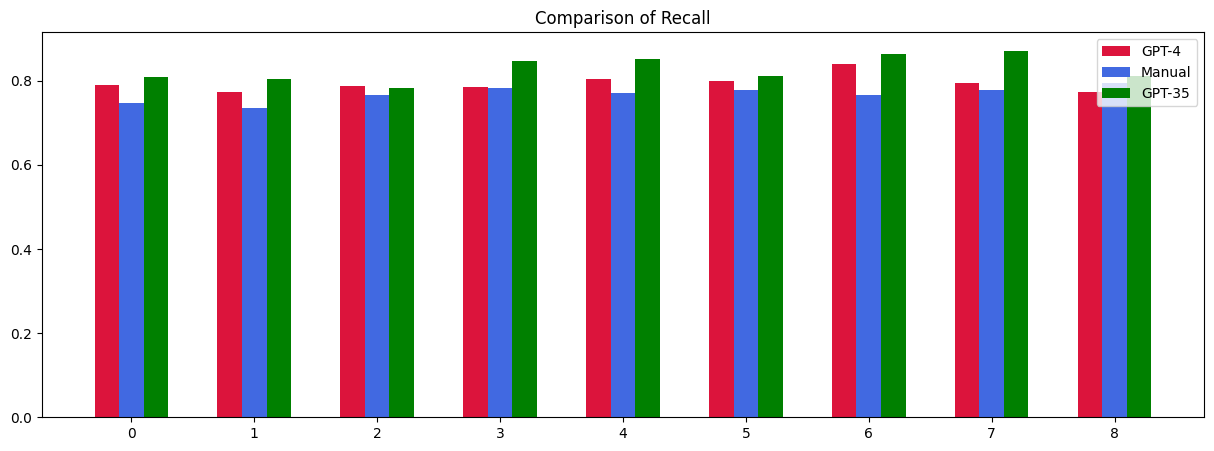

In [71]:
# Plot f1 score

f1_scores = results["recall"]
f1_scores_plain = results_plain["recall"]
f1_scores_gpt_35 = results_gpt_35["recall"]

# plot

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(f1_scores))

ax.bar(x, f1_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], f1_scores_plain, width, label='Manual', color='royalblue')
ax.bar([i + width*2 for i in x], f1_scores_gpt_35, width, label='GPT-35', color='green')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(f1_scores))])
ax.set_title("Comparison of Recall")
ax.legend()

plt.show()

In [54]:
results_gpt4

{'precision': [0.6521058678627014,
  0.6643224954605103,
  0.6281422972679138,
  0.6145917177200317,
  0.6183218955993652,
  0.6424948573112488,
  0.6003948450088501,
  0.6473554968833923,
  0.618371307849884],
 'recall': [0.6366236209869385,
  0.6235613822937012,
  0.62086021900177,
  0.6096000671386719,
  0.6072510480880737,
  0.6156525611877441,
  0.5945109128952026,
  0.6336020827293396,
  0.6214134693145752],
 'f1': [0.6442717909812927,
  0.6432968974113464,
  0.6244800686836243,
  0.6120857000350952,
  0.6127364635467529,
  0.6287873387336731,
  0.597438395023346,
  0.6404049396514893,
  0.6198886632919312],
 'hashcode': 'facebook/bart-large-mnli_L11_no-idf_version=0.3.12(hug_trans=4.27.0.dev0)'}

In [55]:
results_gpt_35

{'precision': [0.6434116959571838,
  0.6135786175727844,
  0.6343647241592407,
  0.6060109734535217,
  0.6336561441421509,
  0.6496988534927368,
  0.6295475363731384,
  0.6321994662284851,
  0.6382576823234558],
 'recall': [0.5967025756835938,
  0.5994625091552734,
  0.6074342727661133,
  0.6039993166923523,
  0.6055898070335388,
  0.5703374147415161,
  0.602471649646759,
  0.6260007619857788,
  0.5993726253509521],
 'f1': [0.619177520275116,
  0.6064384579658508,
  0.6206074953079224,
  0.6050034761428833,
  0.6193051934242249,
  0.6074369549751282,
  0.61571204662323,
  0.6290848851203918,
  0.6182042360305786],
 'hashcode': 'facebook/bart-large-mnli_L11_no-idf_version=0.3.12(hug_trans=4.27.0.dev0)'}

In [56]:
results_deberta_v3_gpt35

{'precision': [0.6462053656578064,
  0.6053144335746765,
  0.6204533576965332,
  0.6099984645843506,
  0.64338618516922,
  0.6711529493331909,
  0.645161509513855,
  0.6248485445976257,
  0.6457805633544922],
 'recall': [0.5897459983825684,
  0.5987589359283447,
  0.5825722217559814,
  0.5854591727256775,
  0.6007969379425049,
  0.570181667804718,
  0.6058452725410461,
  0.6371961832046509,
  0.583759069442749],
 'f1': [0.6166861057281494,
  0.6020188331604004,
  0.6009163856506348,
  0.5974768996238708,
  0.6213626265525818,
  0.616560697555542,
  0.6248855590820312,
  0.6309619545936584,
  0.6132055521011353],
 'hashcode': 'microsoft/deberta-v3-base_L9_no-idf_version=0.3.12(hug_trans=4.27.0.dev0)'}

In [57]:
results_deberta_v3_gpt4

{'precision': [0.6564638614654541,
  0.6562505960464478,
  0.6108186841011047,
  0.6227301359176636,
  0.6037321090698242,
  0.6541074514389038,
  0.6093407869338989,
  0.6502459645271301,
  0.6297975778579712],
 'recall': [0.6455540060997009,
  0.6192583441734314,
  0.5882319211959839,
  0.6009960174560547,
  0.5980139374732971,
  0.6075593829154968,
  0.5883185267448425,
  0.645451545715332,
  0.6155847907066345],
 'f1': [0.6509631872177124,
  0.6372181177139282,
  0.5993125438690186,
  0.6116700768470764,
  0.6008594036102295,
  0.6299747824668884,
  0.5986452102661133,
  0.6478399038314819,
  0.6226101517677307],
 'hashcode': 'microsoft/deberta-v3-base_L9_no-idf_version=0.3.12(hug_trans=4.27.0.dev0)'}

In [58]:
results_longformer_gpt35

{'precision': [0.8333979249000549,
  0.8064426779747009,
  0.8295961618423462,
  0.8323920965194702,
  0.8292905688285828,
  0.8503139019012451,
  0.8240782618522644,
  0.8388121128082275,
  0.843914270401001],
 'recall': [0.8168718814849854,
  0.8134331107139587,
  0.8173574805259705,
  0.8145012855529785,
  0.8110893964767456,
  0.8055998682975769,
  0.8182771801948547,
  0.8319569826126099,
  0.8191688060760498],
 'f1': [0.8250522017478943,
  0.8099228739738464,
  0.8234313726425171,
  0.8233494758605957,
  0.8200889825820923,
  0.8273531198501587,
  0.8211674690246582,
  0.8353704810142517,
  0.831357479095459],
 'hashcode': 'allenai/longformer-large-4096-finetuned-triviaqa_L14_no-idf_version=0.3.12(hug_trans=4.27.0.dev0)'}

In [59]:
results_longformer_gpt4

{'precision': [0.8425096273422241,
  0.8510268926620483,
  0.8270114660263062,
  0.833105206489563,
  0.8274542689323425,
  0.8413091897964478,
  0.8162148594856262,
  0.8387017250061035,
  0.8289621472358704],
 'recall': [0.8326307535171509,
  0.8300791382789612,
  0.8257637023925781,
  0.8195526599884033,
  0.808257520198822,
  0.8218235373497009,
  0.811801552772522,
  0.8303934335708618,
  0.8255344033241272],
 'f1': [0.8375410437583923,
  0.8404224514961243,
  0.8263871073722839,
  0.8262733817100525,
  0.8177432417869568,
  0.8314522504806519,
  0.8140022158622742,
  0.8345268964767456,
  0.827244758605957],
 'hashcode': 'allenai/longformer-large-4096-finetuned-triviaqa_L14_no-idf_version=0.3.12(hug_trans=4.27.0.dev0)'}